In [58]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#reading in all words
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [60]:
#Building the vocabulary of characters and mappings to integrers
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{0: '.', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}


In [72]:
#building the dataset
block_size = 3
def build_dataset(words):
        #context length : characters taken to predict the next one
    X, Y = [], []

    for w in words:

        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]      #crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, y_train = build_dataset(words[:n1])
X_dev, y_dev = build_dataset(words[n1:n2])
X_test, y_test = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [62]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.rand(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [63]:
sum(p.nelement() for p in parameters)

11897

In [64]:
for p in parameters:
    p.requires_grad = True

In [65]:
stepi = []
lossi = []


In [66]:

for i in range(200000):

    #minibatch
    ix = torch.randint(0, X_train.shape[0], (128,))

    #Forward pass
    emb = C[X_train[ix]]          #[32,3,2]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)            #(32,100)
    logits = h @ W2 + b2                                #(32,27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, y_train[ix])


    #backward pass
    for p in parameters:
        p.grad = None

    loss.backward()
    #update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    #tracking stats
    stepi.append(i)
    lossi.append(loss.log10().item())
    
#print(loss.item())

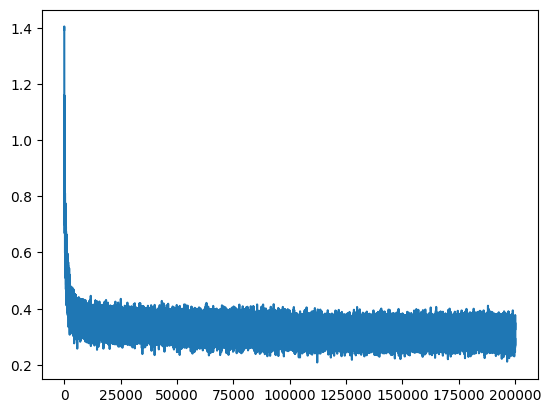

In [67]:
plt.plot(stepi, lossi)

In [68]:
emb = C[X_train]          #[32,3,2]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)            #(32,100)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, y_train)   
loss  

tensor(2.0686, grad_fn=<NllLossBackward0>)

In [69]:
emb = C[X_dev]          #[32,3,2]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)            #(32,100)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, y_dev)   
loss  

tensor(2.0970, grad_fn=<NllLossBackward0>)

In [73]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [74]:
#sampling from the model

g = torch.Generator().manual_seed(2147483647 + 10)
#block_size = 10

for _ in range(20):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]        #(1,block_size,d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

deslyn.
rickinslie.
nsty.
mi.
deil.
brie.
kylin.
merie.
sid.
rhri.
.
.
s.
nish.
diseigell.
ilo.
eimn.
.
edo.
rey.
